In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [52]:
Aquifer_Luco = pd.read_csv('./datasets/Aquifer_Luco.csv')

In [53]:
Aquifer_Luco

,Date,Rainfall_Simignano,Rainfall_Siena_Poggio_al_Vento,Rainfall_Mensano,Rainfall_Montalcinello,Rainfall_Monticiano_la_Pineta,Rainfall_Sovicille,Rainfall_Ponte_Orgia,Rainfall_Scorgiano,Rainfall_Pentolina,...,Depth_to_Groundwater_Pozzo_1,Depth_to_Groundwater_Pozzo_3,Depth_to_Groundwater_Pozzo_4,Temperature_Siena_Poggio_al_Vento,Temperature_Mensano,Temperature_Pentolina,Temperature_Monteroni_Arbia_Biena,Volume_Pozzo_1,Volume_Pozzo_3,Volume_Pozzo_4
0,01/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.00,0.00,5.50,0.80,NaN,NaN,NaN
1,02/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.00,0.00,6.20,3.25,NaN,NaN,NaN
2,03/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.00,0.00,7.25,0.95,NaN,NaN,NaN
3,04/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.00,0.00,7.00,4.20,NaN,NaN,NaN
4,05/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.00,0.00,7.90,6.55,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7482,26/06/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-12.0,-10.7,-11.1,24.45,22.65,22.50,19.55,-125.506506,-147.012716,-49.136663
7483,27/06/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-12.1,-10.8,-11.1,24.80,22.95,22.60,20.15,-125.506506,-147.012716,-49.136663
7484,28/06/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-12.1,-10.7,-11.1,25.90,23.40,23.80,21.05,-125.506506,-147.012716,-49.136663
7485,29/06/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-12.2,-10.8,-11.1,24.85,23.30,23.55,20.30,-125.506506,-147.012716,-49.136663


In [54]:
Aquifer_Luco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7487 entries, 0 to 7486
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Date                                 7487 non-null   object 
 1   Rainfall_Simignano                   6822 non-null   float64
 2   Rainfall_Siena_Poggio_al_Vento       951 non-null    float64
 3   Rainfall_Mensano                     1722 non-null   float64
 4   Rainfall_Montalcinello               6525 non-null   float64
 5   Rainfall_Monticiano_la_Pineta        2205 non-null   float64
 6   Rainfall_Sovicille                   6657 non-null   float64
 7   Rainfall_Ponte_Orgia                 1260 non-null   float64
 8   Rainfall_Scorgiano                   3036 non-null   float64
 9   Rainfall_Pentolina                   2116 non-null   float64
 10  Rainfall_Monteroni_Arbia_Biena       3104 non-null   float64
 11  Depth_to_Groundwater_Podere_Ca

In [55]:
Aquifer_Luco.shape

(7487, 22)

### Filled Entries

<AxesSubplot:>

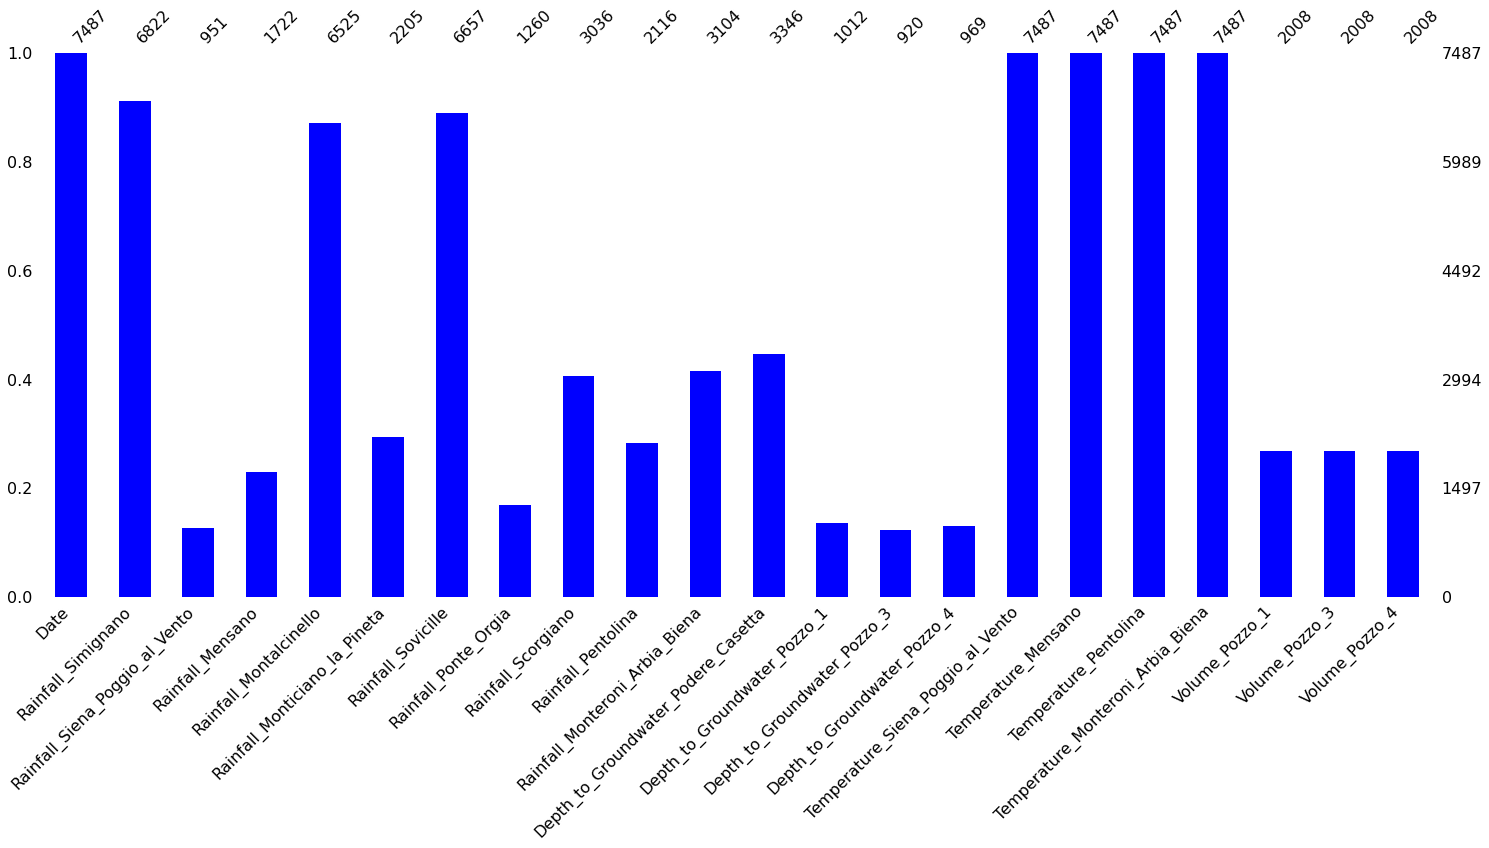

In [56]:
msno.bar(Aquifer_Luco,color='b')

### Dates starting and ending values

In [57]:
print('starting date:', Aquifer_Luco.Date.values[[0,-1]][0])
print('ending date:', Aquifer_Luco.Date.values[[0,-1]][1])


starting date: 01/01/2000
ending date: 30/06/2020


### Position of Null values

<AxesSubplot:>

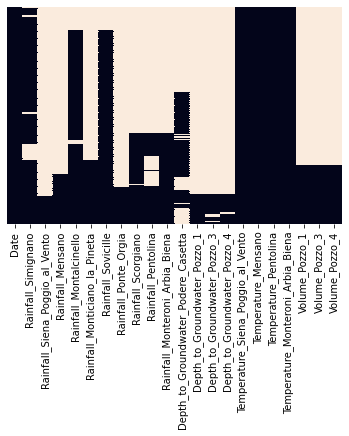

In [58]:
sns.heatmap(Aquifer_Luco.isnull(),yticklabels=False,cbar=False)

In [59]:
data=Aquifer_Luco.copy()
data.drop('Date',axis=1,inplace=True)

In [60]:
null_va = Aquifer_Luco['Depth_to_Groundwater_Podere_Casetta']
null_va.isnull().sum()

4141

In [61]:
Aquifer_Luco.drop(Aquifer_Luco.index[0:2973], inplace=True)
Aquifer_Luco
null_va = Aquifer_Luco['Depth_to_Groundwater_Podere_Casetta']
null_va.isnull().sum()

1168

<AxesSubplot:>

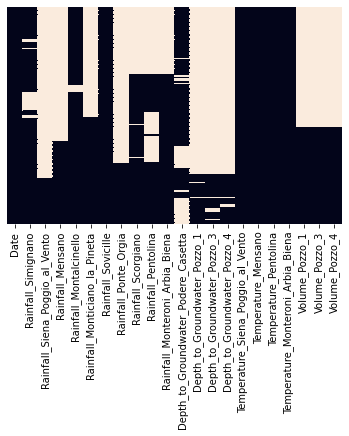

In [62]:
sns.heatmap(Aquifer_Luco.isnull(),yticklabels=False,cbar=False)

### Feature Selection

<AxesSubplot:>

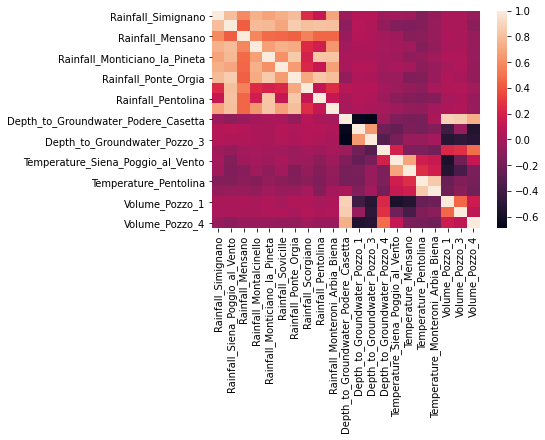

In [63]:
sns.heatmap(data.corr())

In [64]:
features_nan=[features for features in Aquifer_Luco.columns if Aquifer_Luco[features].isnull().sum()>1 and Aquifer_Luco[features].dtypes!='O']
for feature in features_nan:
    print(feature, np.round(Aquifer_Luco[feature].isnull().mean()*100,4),'% missing ')

Rainfall_Simignano 11.9628 % missing 
Rainfall_Siena_Poggio_al_Vento 78.9322 % missing 
Rainfall_Mensano 61.852 % missing 
Rainfall_Montalcinello 3.035 % missing 
Rainfall_Monticiano_la_Pineta 51.152 % missing 
Rainfall_Sovicille 0.1108 % missing 
Rainfall_Ponte_Orgia 72.0868 % missing 
Rainfall_Scorgiano 32.7426 % missing 
Rainfall_Pentolina 53.1236 % missing 
Rainfall_Monteroni_Arbia_Biena 31.2362 % missing 
Depth_to_Groundwater_Podere_Casetta 25.8751 % missing 
Depth_to_Groundwater_Pozzo_1 77.5809 % missing 
Depth_to_Groundwater_Pozzo_3 79.619 % missing 
Depth_to_Groundwater_Pozzo_4 78.5335 % missing 
Volume_Pozzo_1 55.5162 % missing 
Volume_Pozzo_3 55.5162 % missing 
Volume_Pozzo_4 55.5162 % missing 


In [65]:
'''
Columns that are going to be dropped

'Depth_to_Groundwater_Pozzo_1'
'Depth_to_Groundwater_Pozzo_3'
'Depth_to_Groundwater_Pozzo_4'

'Rainfall_Ponte_Orgia'
'Rainfall_Siena_Poggio_al_Vento'
'Rainfall_Mensano'

'''

"\nColumns that are going to be dropped\n\n'Depth_to_Groundwater_Pozzo_1'\n'Depth_to_Groundwater_Pozzo_3'\n'Depth_to_Groundwater_Pozzo_4'\n\n'Rainfall_Ponte_Orgia'\n'Rainfall_Siena_Poggio_al_Vento'\n'Rainfall_Mensano'\n\n"

In [66]:
Aquifer_Luco_corr = Aquifer_Luco.drop(['Depth_to_Groundwater_Pozzo_1','Depth_to_Groundwater_Pozzo_3','Depth_to_Groundwater_Pozzo_4','Rainfall_Ponte_Orgia','Rainfall_Siena_Poggio_al_Vento','Rainfall_Mensano'],axis=1)

<AxesSubplot:>

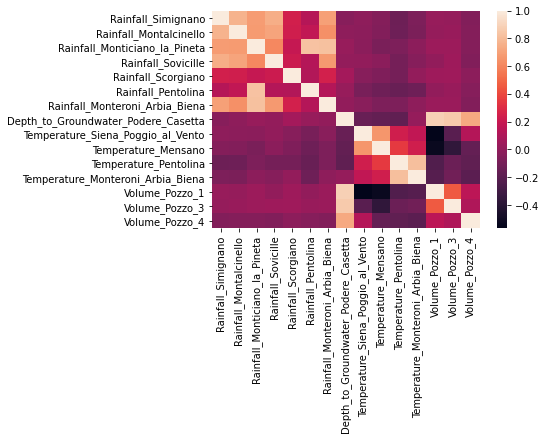

In [67]:
sns.heatmap(Aquifer_Luco_corr.corr())

In [68]:
a = Aquifer_Luco_corr

features_nan=[features for features in a.columns if a[features].isnull().sum()>1 and a[features].dtypes!='O']
for feature in features_nan:
    print(feature, np.round(a[feature].isnull().mean()*100,4),'% missing ')

Rainfall_Simignano 11.9628 % missing 
Rainfall_Montalcinello 3.035 % missing 
Rainfall_Monticiano_la_Pineta 51.152 % missing 
Rainfall_Sovicille 0.1108 % missing 
Rainfall_Scorgiano 32.7426 % missing 
Rainfall_Pentolina 53.1236 % missing 
Rainfall_Monteroni_Arbia_Biena 31.2362 % missing 
Depth_to_Groundwater_Podere_Casetta 25.8751 % missing 
Volume_Pozzo_1 55.5162 % missing 
Volume_Pozzo_3 55.5162 % missing 
Volume_Pozzo_4 55.5162 % missing 


### Imputation